In [1]:
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
#construct an instance of ImageDataGenerator class
datagen = ImageDataGenerator(
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
brightness_range=[0.2,2.0],
horizontal_flip=True,
fill_mode='nearest')

In [3]:
#load the csv file
dog_cat_df = pd.read_csv('dataset/cat_dog_mixed/img_labels.csv',dtype=str)
dog_cat_df.head()

img_code target
0  cat1.png      0
1  cat2.png      0
2  dog1.png      1
3  dog2.png      1

Found 4 validated image filenames belonging to 2 classes.


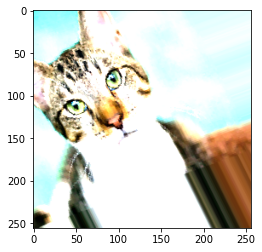

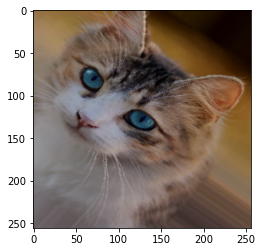

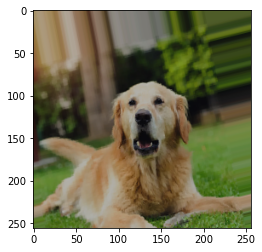

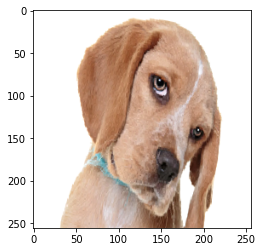

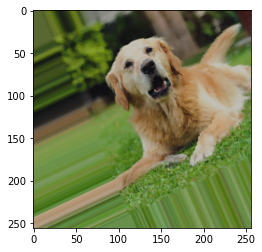

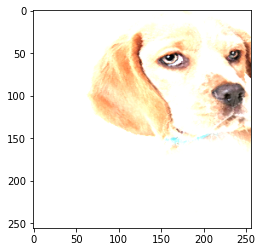

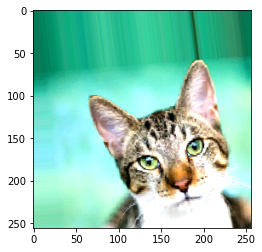

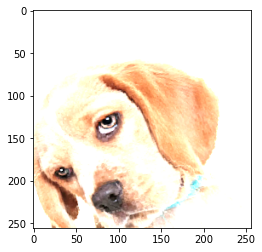

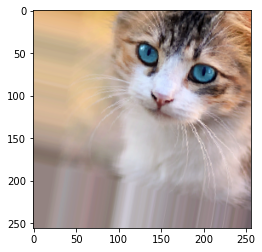

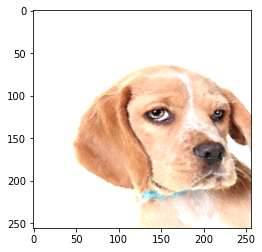

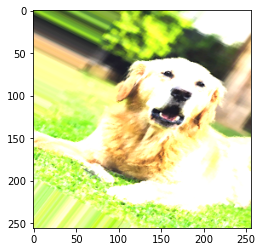

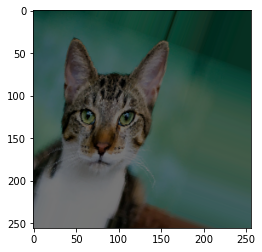

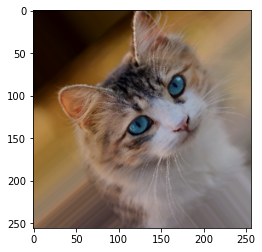

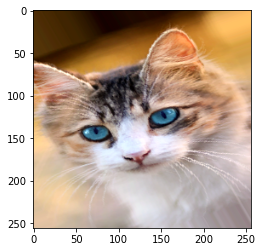

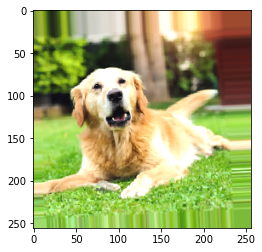

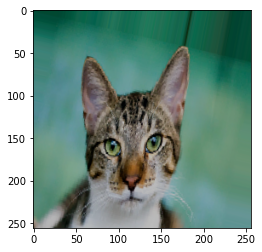

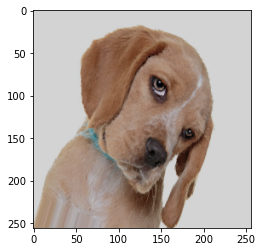

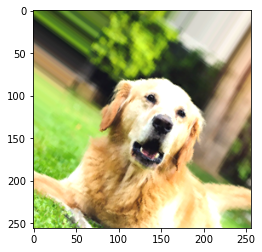

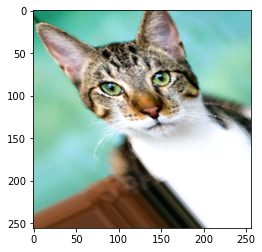

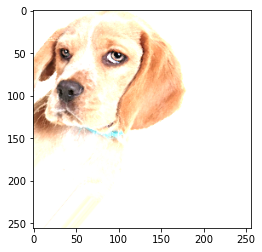

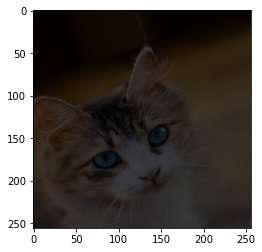

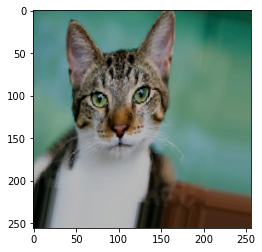

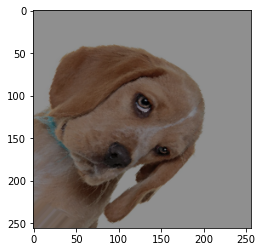

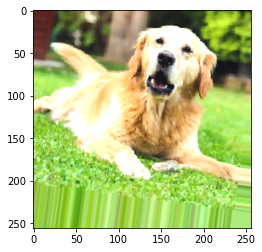

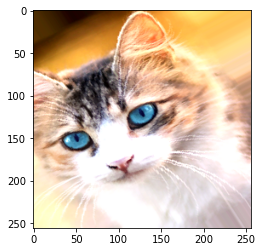

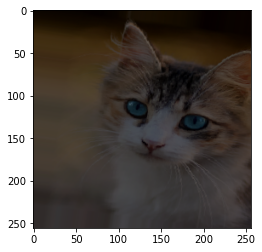

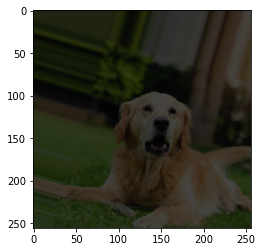

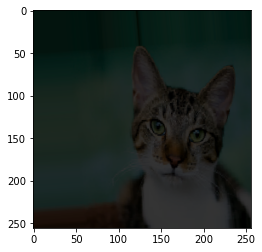

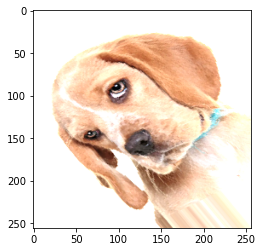

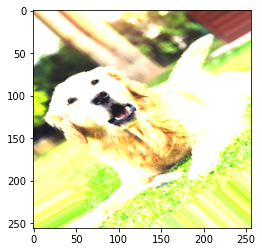

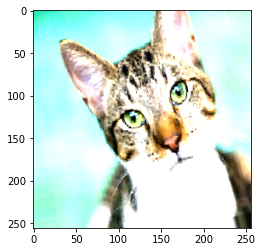

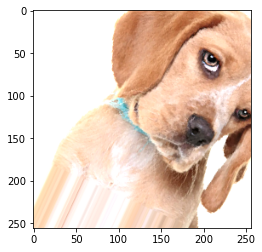

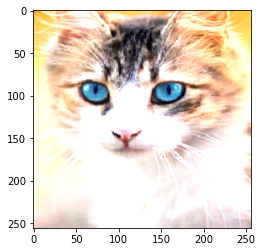

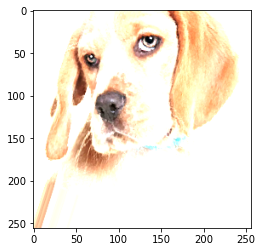

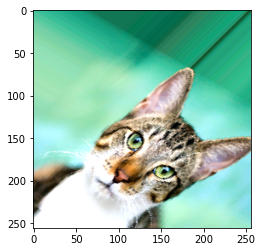

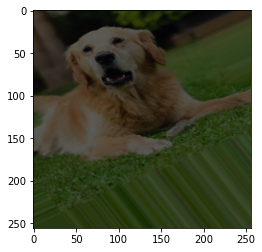

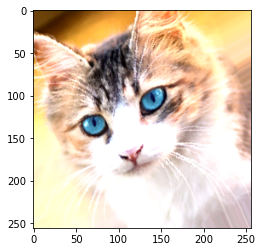

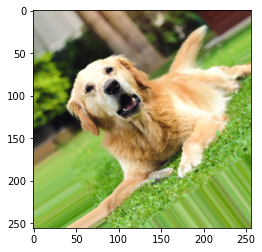

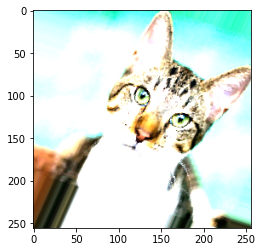

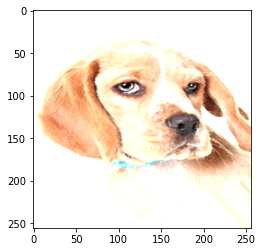

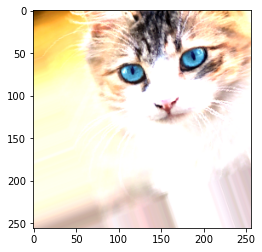

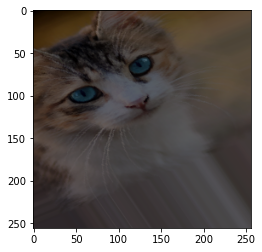

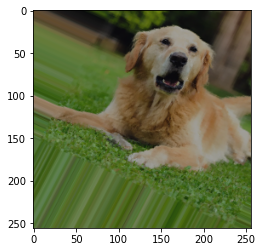

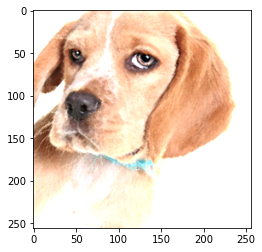

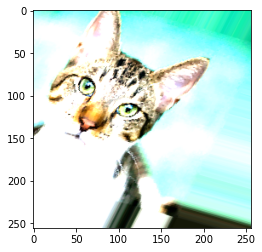

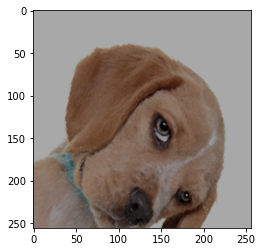

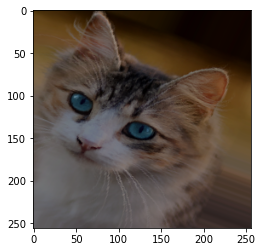

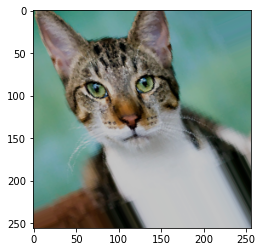

In [5]:
#initializing the counter for break statement
i=0

#getting the iterator as 'batch' from the flow_from_dataframe()
for batch in datagen.flow_from_dataframe(dataframe=dog_cat_df, directory='dataset/cat_dog_mixed', x_col='img_code', y_col='target', batch_size=1):
    
    #Only if want to view the image inline in jupyter
    #convert to unsigned integers
    image = batch[0].astype('uint8')
    #changing the image from multi image based 4D to single 3D
    image =  np.squeeze(image)
    plt.imshow(image)
    plt.show()
    
    i = i+1
    if i > 50:
        break #break the loop at the count of 50
    